# Основы работы с pandas

1. Получить файл набора данных, прилагающийся к этой работе.
2. Считать файл в pandas DataFrame


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./data/Titanic.csv')

In [3]:
df.head()

,Name,PClass,Age,Sex,Survived
0,"Allen, Miss Elisabeth Walton",1st,29.00,female,1
1,"Allison, Miss Helen Loraine",1st,2.00,female,0
2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0
4,"Allison, Master Hudson Trevor",1st,0.92,male,1


3. Ознакомиться с основными параметрами датасета, используя функции библиотеки pandas, включая следующие данные:
    - Количество точек данных (измерений) в наборе
    - Количество полей данных (атрибутов)
    - Тип данных каждого поля, шкала каждого поля
    - Количество отсутствующих значений для каждого поля
    - Количество и названия константных и уникальных полей


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      1313 non-null   object 
 1   PClass    1312 non-null   object 
 2   Age       756 non-null    float64
 3   Sex       1313 non-null   object 
 4   Survived  1313 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 51.4+ KB


In [5]:
print(f'Количество точек данных (измерений): {len(df)}')
print(f'Количество полей данных (атрибутов): {len(df.columns)}')

Количество точек данных (измерений): 1313
Количество полей данных (атрибутов): 5


In [6]:
print('Тип данных каждого поля')
df.dtypes

Тип данных каждого поля


Name         object
PClass       object
Age         float64
Sex          object
Survived      int64
dtype: object

Шкала каждого поля


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Survived'}>]], dtype=object)

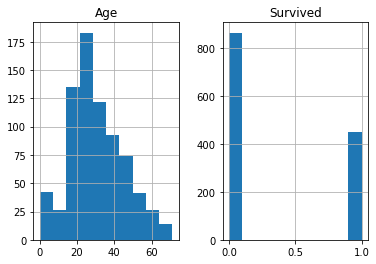

In [7]:
print('Шкала каждого поля') #выводятся только числовые поля
df.hist()

In [8]:
print('Количество отсутствующих значений для каждого поля')
df.isnull().sum()

Количество отсутствующих значений для каждого поля


Name          0
PClass        1
Age         557
Sex           0
Survived      0
dtype: int64

In [9]:
df.nunique() # проверка на уникальность

Name        1310
PClass         3
Age           75
Sex            2
Survived       2
dtype: int64

In [10]:
# по логике, тут имена должны были быть уникальными
# но видим, что имена тоже не все уникальны
df[df.Name.duplicated()] # дублирующиеся имена

,Name,PClass,Age,Sex,Survived
707,"Carlsson, Mr Frans Olof",3rd,33.0,male,0
729,"Connolly, Miss Kate",3rd,22.0,female,1
922,"Kelly, Mr James",3rd,42.0,male,0


In [11]:
# т.к. дубляжи встречаются в имени, то здесь пустота
print('Количество и названия константных и уникальных полей')
print(f'кол-во: {(df.nunique() == len(df)).sum()}')
print(f'названия: {df.loc[:, df.nunique()==df.notnull().sum()].columns.tolist()}')

Количество и названия константных и уникальных полей
кол-во: 0
названия: []


4. Удалить из набора поля, не несущие информативной нагрузки - содержащие уникальные либо константные значения


In [12]:
#если б здесь были таковые столбцы, то инструкция сработала. Но увы и ах. Здесь убирать нечего
df.drop(columns=df.loc[:, df.nunique()==df.notnull().sum()].columns.tolist()) 

,Name,PClass,Age,Sex,Survived
0,"Allen, Miss Elisabeth Walton",1st,29.00,female,1
1,"Allison, Miss Helen Loraine",1st,2.00,female,0
2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0
4,"Allison, Master Hudson Trevor",1st,0.92,male,1
...,...,...,...,...,...
1308,"Zakarian, Mr Artun",3rd,27.00,male,0
1309,"Zakarian, Mr Maprieder",3rd,26.00,male,0
1310,"Zenni, Mr Philip",3rd,22.00,male,0
1311,"Lievens, Mr Rene",3rd,24.00,male,0


In [13]:
# но представим, что все-таки имена у нас уникальные
df.drop(columns=['Name'], inplace=True)

5. Заменить возраст пассажиров на год рождения


In [14]:
crash_year = 1912 # год крушения Титаника
df['Age'] = df['Age'].apply(lambda x: crash_year - x)
df

,PClass,Age,Sex,Survived
0,1st,1883.00,female,1
1,1st,1910.00,female,0
2,1st,1882.00,male,0
3,1st,1887.00,female,0
4,1st,1911.08,male,1
...,...,...,...,...
1308,3rd,1885.00,male,0
1309,3rd,1886.00,male,0
1310,3rd,1890.00,male,0
1311,3rd,1888.00,male,0


In [15]:
df.head()

,PClass,Age,Sex,Survived
0,1st,1883.00,female,1
1,1st,1910.00,female,0
2,1st,1882.00,male,0
3,1st,1887.00,female,0
4,1st,1911.08,male,1


6. Переименовать все названия колонок на русском языке


In [16]:
df.columns = ['Класс', 'Возраст', 'Пол', 'Выживший']
df.head()

,Класс,Возраст,Пол,Выживший
0,1st,1883.00,female,1
1,1st,1910.00,female,0
2,1st,1882.00,male,0
3,1st,1887.00,female,0
4,1st,1911.08,male,1


7. Заменить все отсутствующие данные средним значением (в случае числового поля) либо самым распространенным в категориальных полях.


In [17]:
print('Количество отсутствующих значений для каждого поля')
df.isnull().sum()

Количество отсутствующих значений для каждого поля


Класс         1
Возраст     557
Пол           0
Выживший      0
dtype: int64

In [18]:
# не достает у нас в столбцах Возраст(числовой) и Класс(категория)
import numpy as np 

#numpy просто чтобы округлить значение, т.к. это все-таки год
np.around(df['Возраст'].mean())

1882.0

In [19]:
d = df['Класс'].mode()
d.values[0]

'3rd'

In [20]:
df.fillna(np.around(df['Возраст'].mean()), inplace=True)
df['Класс'].fillna(d.values[0], inplace=True)

In [21]:
df.count() #проверка

Класс       1313
Возраст     1313
Пол         1313
Выживший    1313
dtype: int64

8. Сохранить получившийся набор данных в формате CSV


In [22]:
df.to_csv('./result/result_titanic.csv', index=False)

9. Открыть данный файл в программе Microsoft Excel и сохранить в формате .xlsx
10. Считать файл .xlsx в новый DataFrame


In [23]:
df_new = pd.read_excel('./data/result_titanic.xlsx')
df_new.head()

,Имя,Класс,Возраст,Пол,Выживший
0,"Allen, Miss Elisabeth Walton",1st,1883.00,female,1
1,"Allison, Miss Helen Loraine",1st,1910.00,female,0
2,"Allison, Mr Hudson Joshua Creighton",1st,1882.00,male,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,1887.00,female,0
4,"Allison, Master Hudson Trevor",1st,1911.08,male,1


## Контрольные вопросы

1. Какие две главные структуры данных используются в pandas? В чем их отличие?


In [24]:
#ответ - Series и Pandas

# Series — для работы с последовательностью одномерных данных
# Dataframe — более сложная и подходит для нескольких измерений (таблица)

2. Назовите основные функции чтения данных из файлов



In [25]:
# pd.read_csv('example.csv')

# pd.read_excel('example.xlsx')

# pd.read_json('example.json')

# pd.read_pickle('example.pkl')

# pd.read_hdf('example.hdf')

3. Напишите функцию записи набора данных А в файл с разделителями-запятыми


In [26]:
# файл с разделителями-запятыми - это csv-файл
def write_to_file(arr):
    df_ = pd.DataFrame(arr)
    df_.to_csv('./result/file.csv')

In [27]:
import numpy as np

arr = np.random.randint(0,100,size=(15, 4))
write_to_file(arr)

4. Как называется функция, выводящая на экран первые N строчек набора данных?



In [28]:
# ответ - head() - в скобках можно указать кол-во строк

df.head(3)

,Класс,Возраст,Пол,Выживший
0,1st,1883.0,female,1
1,1st,1910.0,female,0
2,1st,1882.0,male,0


5. С помощью какой функции можно удалить поле набора данных? А строку?

In [29]:
# drop

df_copy = df.copy()
df_copy.drop(columns=['Пол'], inplace=True) # удаление столбца

In [30]:
df.head(2) #старый df 

,Класс,Возраст,Пол,Выживший
0,1st,1883.0,female,1
1,1st,1910.0,female,0


In [31]:
df_copy.head(2) #новый df - столбец удалился

,Класс,Возраст,Выживший
0,1st,1883.0,1
1,1st,1910.0,0


In [32]:
df_copy.drop([0,1], inplace=True)# удаление строки

In [33]:
df.head(2) #старый df 

,Класс,Возраст,Пол,Выживший
0,1st,1883.0,female,1
1,1st,1910.0,female,0


In [34]:
df_copy.head(2) #новый df - строки удалились

,Класс,Возраст,Выживший
2,1st,1882.0,0
3,1st,1887.0,0


In [35]:
df_copy.tail()

,Класс,Возраст,Выживший
1308,3rd,1885.0,0
1309,3rd,1886.0,0
1310,3rd,1890.0,0
1311,3rd,1888.0,0
1312,3rd,1883.0,0


In [36]:
df_copy[-1:]

,Класс,Возраст,Выживший
1312,3rd,1883.0,0


6. Напишите участок кода, демонстрирующий возможность добавления новой строки к набору данных. 


In [37]:
arr2 = {'Класс':'1st', 'Возраст':1880,'Выживший':'1'}
df_copy = df_copy.append(arr2, ignore_index = True)
df_copy.tail(3)

,Класс,Возраст,Выживший
1309,3rd,1888.0,0
1310,3rd,1883.0,0
1311,1st,1880.0,1


7. Напишите участок кода, демонстрирующий возможность добавления новой колонки (поля) к набору данных. 

In [38]:
# v1
df_copy['checked'] = 1
df_copy.head()

,Класс,Возраст,Выживший,checked
0,1st,1882.00,0,1
1,1st,1887.00,0,1
2,1st,1911.08,1,1
3,1st,1865.00,1,1
4,1st,1849.00,1,1


In [39]:
# v2
df_copy.insert(1, "Сейчас живы", 0)
df_copy.head()

,Класс,Сейчас живы,Возраст,Выживший,checked
0,1st,0,1882.00,0,1
1,1st,0,1887.00,0,1
2,1st,0,1911.08,1,1
3,1st,0,1865.00,1,1
4,1st,0,1849.00,1,1


In [40]:
# v3
df_copy.loc[:, "Еще один столбец"] = 'll'
df_copy.head()

,Класс,Сейчас живы,Возраст,Выживший,checked,Еще один столбец
0,1st,0,1882.00,0,1,ll
1,1st,0,1887.00,0,1,ll
2,1st,0,1911.08,1,1,ll
3,1st,0,1865.00,1,1,ll
4,1st,0,1849.00,1,1,ll
